In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df=pd.read_csv('train.csv',index_col=False)

In [ ]:
df.head()

,Warehouse id,Region,SKU id,Apr-18,May-18,Jun-18,Jul-18,Aug-18,Sep-18,Oct-18,...,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21
0,Wh-1,NORTH,SKU-1,27,13,30,14,22,8,8,...,12,8,8,8,8,8,14,16,8,12
1,Wh-1,NORTH,SKU-2,88,28,127,130,58,10,7,...,16,7,7,7,7,7,13,43,13,43
2,Wh-1,NORTH,SKU-3,6,6,6,6,6,6,6,...,8,6,6,6,6,6,6,8,26,6
3,Wh-1,NORTH,SKU-4,162,184,110,172,90,40,18,...,82,78,38,18,22,28,36,352,58,18
4,Wh-1,NORTH,SKU-5,171,402,627,615,300,417,141,...,468,216,75,6,30,66,141,699,183,24


In [ ]:
# df=df.drop(['May-21'],axis=1)

In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 12

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

 
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) 

  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) 
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
def make_windows(x, window_size=12, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
 
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T 

  windowed_array = x[window_indexes]

 
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
df_east=df.loc[df['Region'] == "EAST"]
df_west=df.loc[df['Region'] == "WEST"]
df_north=df.loc[df['Region'] == "NORTH"]
df_south=df.loc[df['Region'] == "SOUTH"]


In [ ]:
e=np.sum(np.sum(df_east.iloc[:,3:]))

In [ ]:
w=np.sum(np.sum(df_west.iloc[:,3:]))

In [ ]:
n=np.sum(np.sum(df_north.iloc[:,3:]))

In [ ]:
s=np.sum(np.sum(df_south.iloc[:,3:]))

In [ ]:
def normalize(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = (x - np.max(x))
    return e_x / e_x.sum()

In [ ]:
x=[n,s,e,w]
x=normalize(x)

In [ ]:
print(x)

[-0.          0.24397366  0.39819341  0.35783292]


In [ ]:
df_north=df_north.drop(['Warehouse id','Region','SKU id'],axis=1)
df_north=np.array(df_north,dtype=float)
window=[]
f_label=[]
for i in df_north:
     windows,label=make_windows(i)
     for j in windows:
        t=np.insert(j,0,x[0])
        window.append(t)
     for j in label:
       f_label.append(j)  
window1=np.array(window,dtype=float)
f_label1=np.array(f_label)

In [ ]:
df_south=df_south.drop(['Warehouse id','Region','SKU id'],axis=1)
df_south=np.array(df_south,dtype=float)
window=[]
f_label=[]
for i in df_south:
     windows,label=make_windows(i)
     for j in windows:
       t=np.insert(j,0,x[1])
      
       window.append(t)
     for j in label:
       f_label.append(j)  
window4=np.array(window,dtype=float)
f_label4=np.array(f_label)

In [ ]:
df_east=df_east.drop(['Warehouse id','Region','SKU id'],axis=1)
df_east=np.array(df_east,dtype=float)
window=[]
f_label=[]
for i in df_east:
     windows,label=make_windows(i)
     for j in windows:
       t=np.insert(j,0,x[2])
       window.append(t)
     for j in label:
       f_label.append(j)  
window2=np.array(window,dtype=float)
f_label2=np.array(f_label)

In [ ]:
df_west=df_west.drop(['Warehouse id','Region','SKU id'],axis=1)
df_west=np.array(df_west,dtype=float)
window=[]
f_label=[]
for i in df_west:
     windows,label=make_windows(i)
     for j in windows:
       t=np.insert(j,0,x[3])
       window.append(t)
     for j in label:
       f_label.append(j)  
window3=np.array(window,dtype=float)
f_label3=np.array(f_label)

In [ ]:
x=[]
y=[]
for i in window2:
  x.append(i)
for i in f_label2:
  y.append(i)
for i in window1:
  x.append(i)
for i in f_label1:
  y.append(i)

for i in window3:
  x.append(i)
for i in f_label3:
  y.append(i)
for i in window4:
  x.append(i)
for i in f_label4:
  y.append(i)


In [ ]:
split_size = int(len(x))
X_train, y_train = x[:], y[:]


In [ ]:
X_train=np.array(X_train)

y_train=np.array(y_train)



In [ ]:
# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)



# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))


# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 13), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

In [ ]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 250 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30


INPUT_SIZE = 13 * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(13, 14)

In [ ]:
def scheduler(epoch, lr):
  if epoch <150:
    return lr
  elif epoch<200:
    return 0.0001
  else :
    return 0.00001
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
 %%time
from tensorflow.keras import layers
tf.random.set_seed(101)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174 
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mape", "mae","mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
history=model_7.fit(train_dataset,
            epochs=N_EPOCHS,
           
            # verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[callback,callback,tf.keras.callbacks.EarlyStopping(monitor="loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="loss", patience=100, verbose=1)])

Epoch 1/250
27/27 [==============================] - 27s 173ms/step - loss: 727.7286 - mape: 1555.1121 - mae: 727.7286 - mse: 21938692.0000 - lr: 0.0010
Epoch 2/250
27/27 [==============================] - 4s 149ms/step - loss: 120.9049 - mape: 279.1394 - mae: 120.9049 - mse: 259198.0781 - lr: 0.0010
Epoch 3/250
27/27 [==============================] - 4s 143ms/step - loss: 138.3206 - mape: 316.8630 - mae: 138.3206 - mse: 275132.4062 - lr: 0.0010
Epoch 4/250
27/27 [==============================] - 4s 143ms/step - loss: 126.8197 - mape: 295.3834 - mae: 126.8197 - mse: 286540.8125 - lr: 0.0010
Epoch 5/250
27/27 [==============================] - 4s 149ms/step - loss: 116.9590 - mape: 271.7445 - mae: 116.9590 - mse: 224737.9219 - lr: 0.0010
Epoch 6/250
27/27 [==============================] - 4s 150ms/step - loss: 112.2298 - mape: 268.4404 - mae: 112.2298 - mse: 190349.8281 - lr: 0.0010
Epoch 7/250
27/27 [==============================] - 4s 150ms/step - loss: 109.7589 - mape: 263.7377 -

Text(0, 0.5, 'mae')

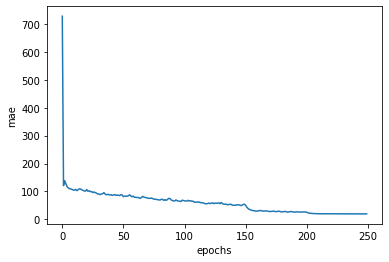

In [ ]:
plt.plot(history.history['mae'])
plt.xlabel("epochs")
plt.ylabel("mae")

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
df=pd.read_csv('train.csv',index_col=False)
# y_test=df['May-21']
# df=df.drop(['May-21'],axis=1)
# n e w s
df_east=df.loc[df['Region'] == "EAST"]
df_west=df.loc[df['Region'] == "WEST"]
df_north=df.loc[df['Region'] == "NORTH"]
df_south=df.loc[df['Region'] == "SOUTH"]



In [ ]:
df_north=df_north.iloc[:,-12:]
df_east=df_east.iloc[:,-12:]
df_west=df_west.iloc[:,-12:]
df_south=df_south.iloc[:,-12:]


# n s e w

In [ ]:
x=[n,s,e,w]
x=normalize(x)
x_final=[]
df_north=np.array(df_north,dtype=float)
for i in df_north:
  t=np.insert(i,0,0.00)
  x_final.append(t)
df_east=np.array(df_east,dtype=float)
for i in df_east:
  t=np.insert(i,0,x[2])
  x_final.append(t)
df_west=np.array(df_west,dtype=float)
for i in df_west:
  t=np.insert(i,0,x[3])
  x_final.append(t)
df_south=np.array(df_south,dtype=float)
for i in df_south:
  t=np.insert(i,0,x[1])
  x_final.append(t)






In [ ]:
x_final=np.array(x_final)

In [ ]:
# Make predictions with N-BEATS model
y=model_7.predict(x_final)

In [ ]:
y=np.array(y,dtype=int)


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y)
print(mape)

2.533105753630635


In [ ]:
y=np.array(y,dtype=int)

In [ ]:
z=pd.DataFrame(y)

In [ ]:
from google.colab import files
z.to_csv('final1.csv')
files.download("final1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>